<a href="https://colab.research.google.com/github/merdogan97/DVwPy/blob/main/DVwPY_Assignment_2_(PoliceKillingsUS)_14_02_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH SEABORN

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

In [3]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [4]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill.shape

(2535, 14)

# **1a: Box plot of age in both genders separeted by manner of death.**

In [5]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

# **INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**


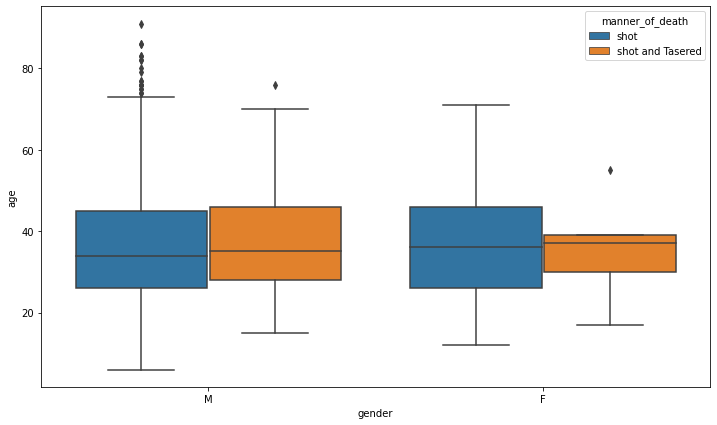

In [7]:
# with seaborn
plt.figure(figsize=(12, 7)) 
sns.boxplot(x="gender", y="age", data=kill, hue="manner_of_death");
plt.show()

# **INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**# 
# **1b: Swarm Plot**

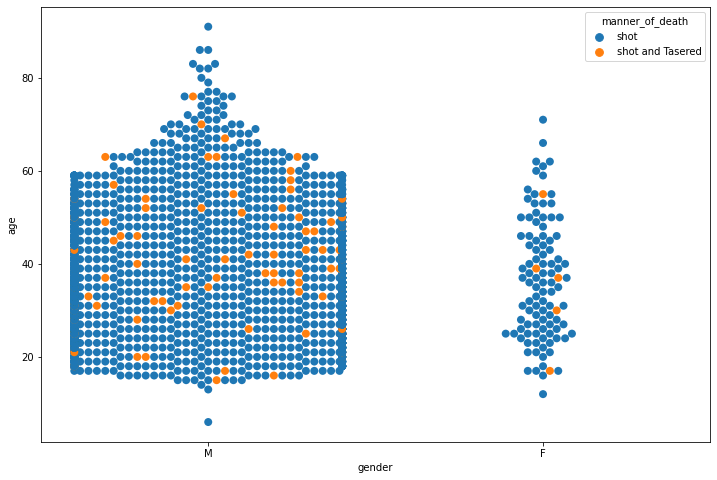

In [8]:
# with seaborn
plt.figure(figsize=(12, 8)) 
sns.swarmplot(x ="gender", y= "age", data = kill, hue="manner_of_death", size=8);
plt.show()

# **## 2: Plot 12 most dangerous cities**

In [86]:
city_freq = kill.city.value_counts()[:12]
city_freq

Los Angeles      39
Phoenix          31
Houston          27
Chicago          25
Las Vegas        21
San Antonio      20
Columbus         19
Austin           18
Miami            18
St. Louis        15
Oklahoma City    14
Tucson           14
Name: city, dtype: int64

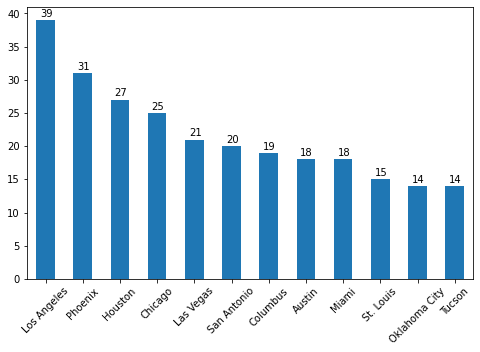

In [89]:
fig, ax = plt.subplots(figsize=(8, 5))

city_freq.plot(kind='bar', ax=ax)
ax.set_xticklabels(city_freq.index, rotation=45)

for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+0.1,p.get_height()+0.5 ))
plt.show()


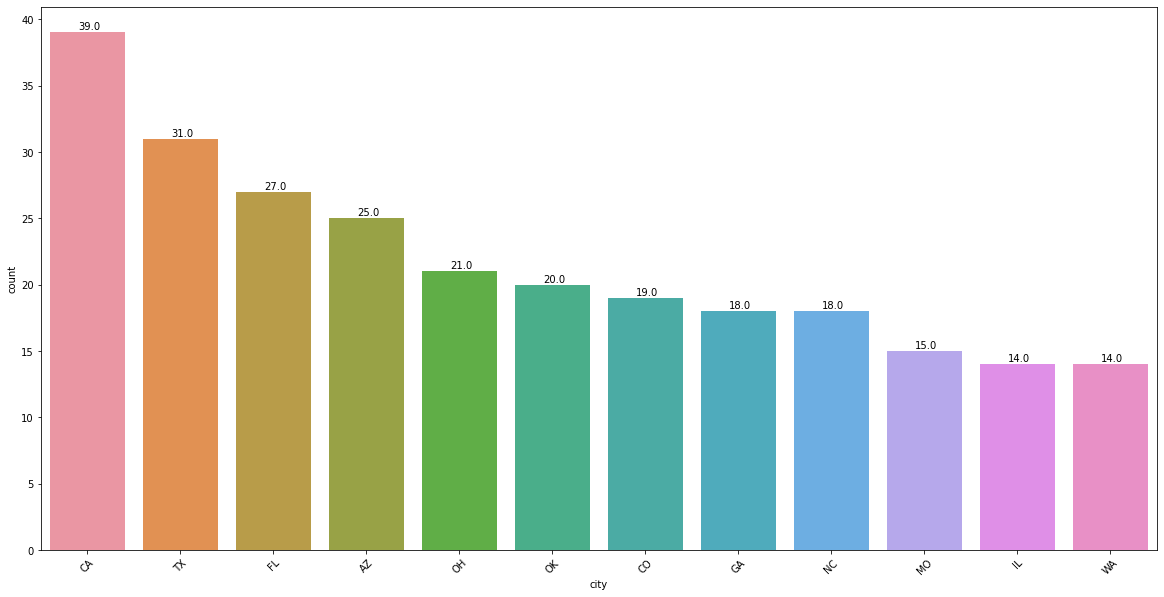

In [84]:
# with seaborn barplot
fig, ax = plt.subplots(figsize=(20, 10))
city = kill.city.value_counts(ascending=False)[:12]
df_city = kill.filter(["city"], axis=1)
df_city["count"] = 1
grouped_city = df_city.groupby("city", as_index=False, sort=False).sum()
grouped_city.sort_index(ascending=False)
grouped_city = grouped_city.sort_values("count", ascending=False).head(12) 
sns.barplot(data=grouped_city, x="city", y="count")
ax.set_xticklabels(city_freq.index, rotation=45);
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+0.3,p.get_height()+0.2))

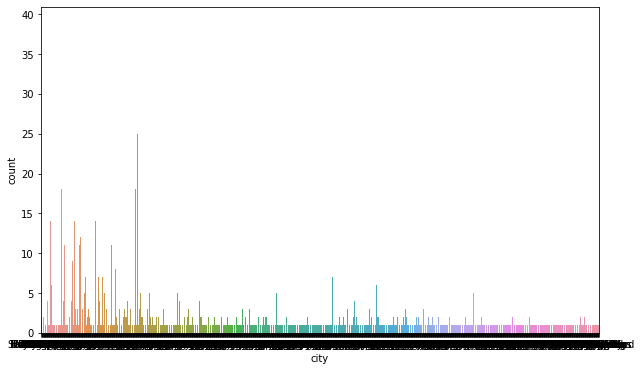

In [97]:
# with seaborn countplot
fig, ax=plt.subplots(figsize=(10,6))
sns.countplot(x =kill["city"], data=kill);

# **3: Plot 20 most dangerous states**

In [14]:
kill.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False


In [22]:
kill.state.value_counts()[:20]


CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
PA     51
NM     51
AL     50
VA     47
NY     45
SC     44
Name: state, dtype: int64

In [24]:
kill['state'].value_counts().index

Index(['CA', 'TX', 'FL', 'AZ', 'OH', 'OK', 'CO', 'GA', 'NC', 'MO', 'IL', 'WA',
       'TN', 'LA', 'PA', 'NM', 'AL', 'VA', 'NY', 'SC', 'IN', 'WI', 'KY', 'NV',
       'OR', 'MD', 'MI', 'NJ', 'MN', 'WV', 'AR', 'KS', 'MS', 'UT', 'MA', 'ID',
       'AK', 'NE', 'ME', 'IA', 'MT', 'HI', 'DC', 'SD', 'CT', 'DE', 'WY', 'NH',
       'ND', 'VT', 'RI'],
      dtype='object')

In [26]:
kill['state'].value_counts().values

array([424, 225, 154, 118,  79,  78,  74,  70,  69,  64,  62,  62,  59,
        57,  51,  51,  50,  47,  45,  44,  43,  43,  43,  42,  38,  38,
        37,  35,  32,  27,  26,  24,  23,  23,  22,  17,  15,  15,  13,
        12,  11,  11,  11,  10,   9,   8,   8,   7,   4,   3,   2])

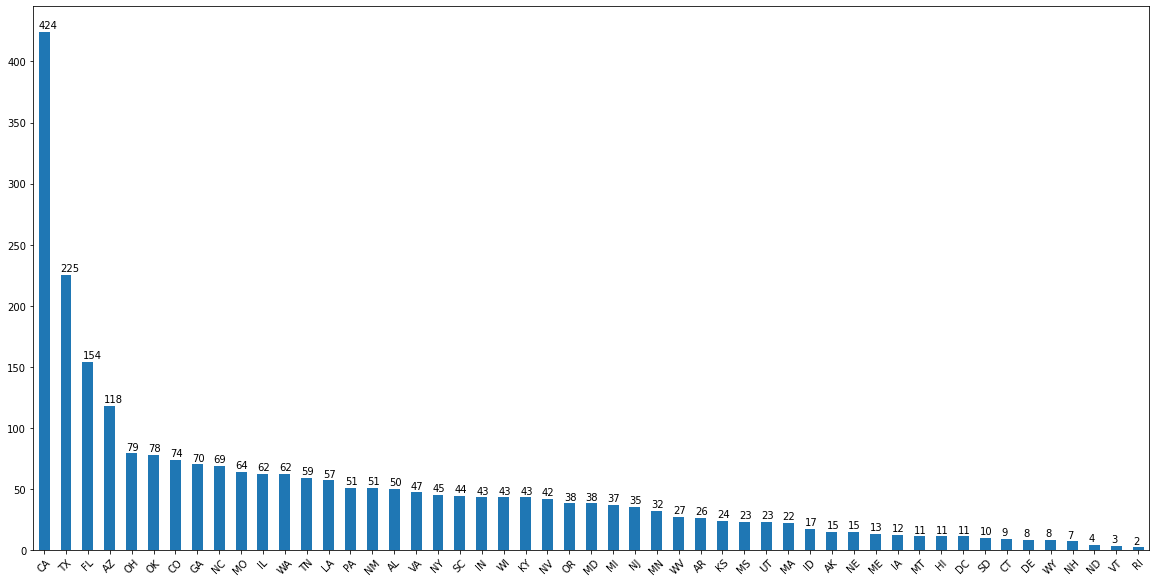

In [38]:
# with seaborn barplot
fig, ax= plt.subplots(figsize=(20,10)) 
kill['state'].value_counts().plot(kind="bar", x=kill['state'].value_counts().index, y=kill['state'].value_counts().values)
plt.xticks(rotation=45);
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x(),p.get_height()+3 ))

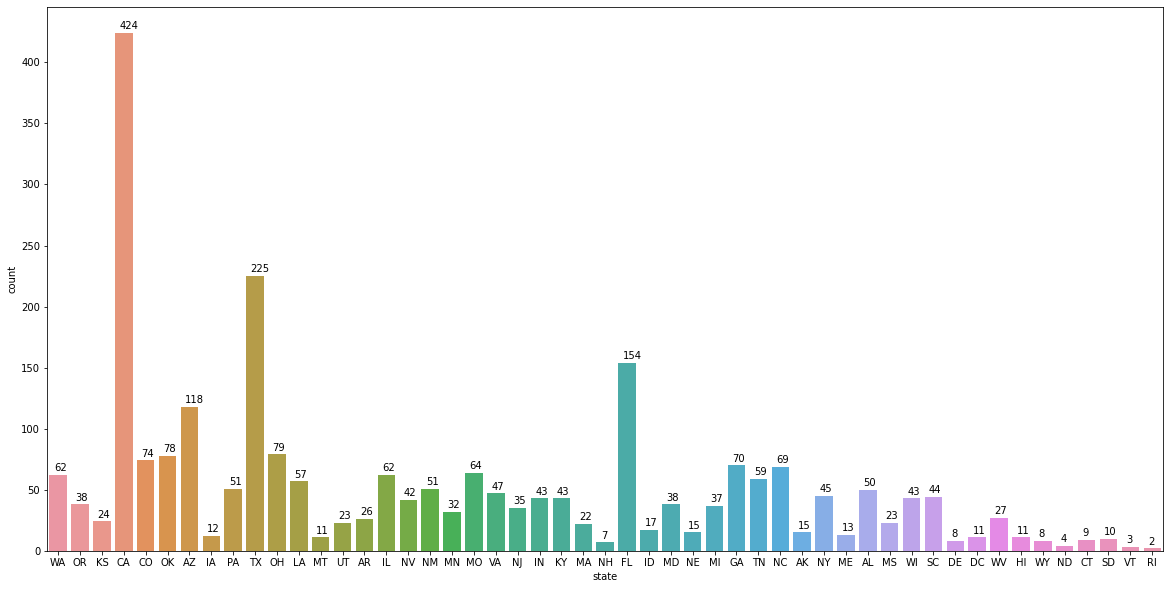

In [32]:
# with seaborn countplot
fig, ax= plt.subplots(figsize=(20,10))    
sns.countplot(x=kill['state']);
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+0.2,p.get_height()+3 ))

# **## 4: Plot Having mental ilness or not for killed people**

In [41]:
kill.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
34,60,Quincy Reed Reindl,15/01/15,shot,gun,24.0,M,W,Bloomington,MN,True,attack,Not fleeing,False
1285,1473,Gerald Robert Boyes,16/04/16,shot,gun,53.0,M,W,Antioch,IL,False,attack,Not fleeing,False
501,625,Cyrus Hurtado,09/07/15,shot,gun,17.0,M,W,Boulder Creek,CA,True,attack,Not fleeing,False
1272,1452,Arturo Yobani-Torrez Valdez,10/04/16,shot,knife,28.0,M,H,Los Angeles,CA,False,attack,Not fleeing,False
2279,2537,Tim A. Holmgren,27/04/17,shot,gun,53.0,M,W,Rapid City,SD,False,attack,Not fleeing,False


In [45]:
kill. signs_of_mental_illness.value_counts()


False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

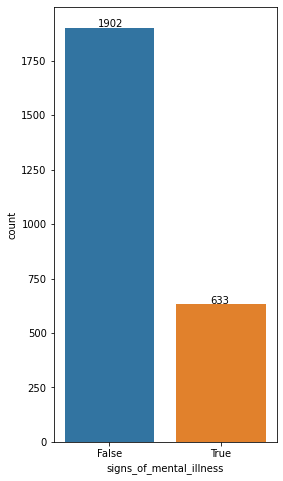

In [55]:
# with seaborn
fig, ax= plt.subplots(figsize=(4,8))  
sns.countplot(x='signs_of_mental_illness', data=kill);
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+0.3,p.get_height()+3 ))

# **5: Plot number of Threat Types**

In [56]:
kill.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2467,2744,Jesus Cervantes,06/07/17,shot,vehicle,35.0,M,NaN,Plant City,FL,False,other,Car,False
1169,1333,James Scott,06/03/16,shot,unarmed,42.0,M,W,Bismarck,ND,False,undetermined,Foot,False
2360,2631,Roman Jade Carrillo,30/05/17,shot,gun,18.0,M,H,Salt Lake City,UT,False,attack,Car,False
1565,1754,Richard Lance London,02/08/16,shot,gun,22.0,M,W,Lake City,SC,False,attack,Car,False
1712,1919,Christopher Sowell,28/09/16,shot,undetermined,32.0,M,B,Philadelphia,PA,False,attack,Not fleeing,False


In [57]:
kill.threat_level.value_counts()

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

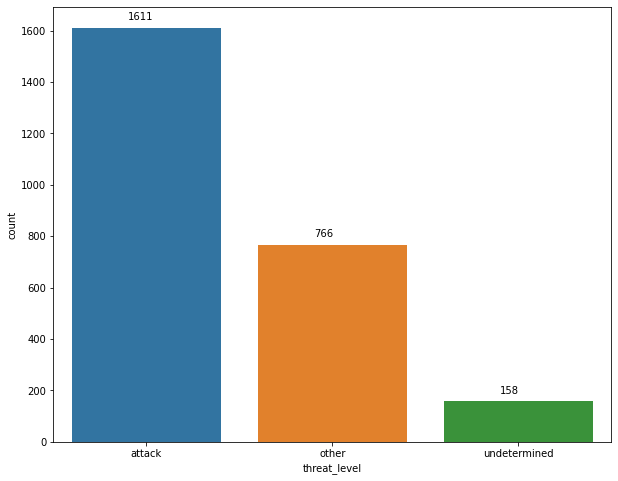

In [61]:
# with seaborn:
fig, ax= plt.subplots(figsize=(10,8))                   
sns.countplot(x=kill['threat_level']);
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+0.3,p.get_height()+30 ))

# **6: Plot number of Flee Types**

In [62]:
kill.sample(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
623,753,Jason Hale,19/08/15,shot,gun,29.0,M,W,Hunters,WA,True,attack,Foot,False
2173,2419,Christopher Apostolos,14/03/17,shot,unarmed,56.0,M,W,Toms River,NJ,True,attack,NaN,False
2325,2583,Buford Shane Whitson,15/05/17,shot,gun,47.0,M,W,Johnson City,TN,True,attack,Other,False


In [75]:
kill.flee.value_counts()

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

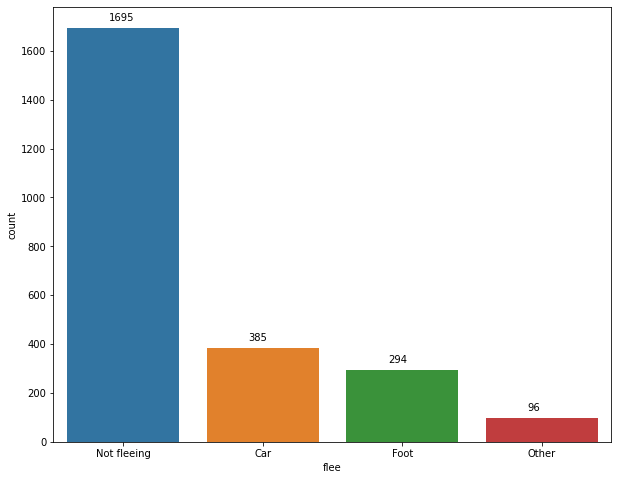

In [78]:
# with seaborn
fig, ax= plt.subplots(figsize=(10,8))                   
sns.countplot(x=kill['flee']);
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+0.3,p.get_height()+30 ))